# Korelacja i regresja - zadanie

Zbiór danych **cars.sta** zawiera wyniki pewnych testów drogowych samochodów.
Zmienne:
- mpg: Liczba mil, jakie samochód może przejechać na jednym galonie paliwa. Oznacza "Miles Per Gallon" (mile na galon).
- cylinders: Liczba cylindrów w silniku.
- displacement: Pojemność skokowa silnika, mierzona w calach sześciennych (cu.in.).
- horsepower: Moc silnika, wyrażona w koniach mechanicznych.
- weight: Waga samochodu, podana w setkach funtów (1000 lbs).
- acceleration: Przyśpieszenie pojazdu.
- model: Rok pojazdu.
- origin: Pochodzenie pojazdu - reprezentuje kod kraju.
- car: Nazwa samochodu.



## Wczytywanie danych
Wczytaj jako ramka danych plik "cars2.csv", a nastepnie:
- wyświetl kilka pierwszych wierszy
- wyświetl strukturę ramki danych
- wyświetl rozmiar ramki danych


In [6]:
df <- read.csv("cars.csv", stringsAsFactors = TRUE)
head(df)

str(df)

dim(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,33.0,4,91,32,1795,17.4,76,3,honda civic
2,20.0,6,225,2,3651,17.7,76,1,dodge aspen se
3,18.0,6,250,50,3574,21.0,76,1,ford granada ghia
4,18.5,6,250,7,3645,16.2,76,1,pontiac ventura sj
5,17.5,6,258,62,3193,17.8,76,1,amc pacer d/l
6,29.5,4,97,44,1825,12.2,76,2,volkswagen rabbit


'data.frame':	200 obs. of  9 variables:
 $ mpg         : num  33 20 18 18.5 17.5 29.5 32 28 26.5 20 ...
 $ cylinders   : int  4 6 6 6 6 4 4 4 4 4 ...
 $ displacement: int  91 225 250 250 258 97 85 97 140 130 ...
 $ horsepower  : int  32 2 50 7 62 44 43 47 45 3 ...
 $ weight      : int  1795 3651 3574 3645 3193 1825 1990 2155 2565 3150 ...
 $ acceleration: num  17.4 17.7 21 16.2 17.8 12.2 17 16.4 13.6 15.7 ...
 $ model       : int  76 76 76 76 76 76 76 76 76 76 ...
 $ origin      : int  3 1 1 1 1 2 3 3 1 2 ...
 $ car         : Factor w/ 179 levels "amc concord",..: 94 56 81 145 5 167 49 154 88 172 ...


[1] 200   9

Sprawdź, czy wystepują braki. Wyświetl ich sumę. Jeśli wystepują uzupełnij
 je np. medianą. Sprawdź rezultat.


In [10]:
sum(is.na(df))

colnames(df)[colSums(is.na(df)) > 0]

df$horsepower[is.na(df$horsepower)]=median(df$horsepower, na.rm=TRUE)


[1] 0

character(0)

Wybierz do analizy tylko zmienne numeryczne.

In [14]:
num_cols <- sapply(df, is.numeric)
num_cols

mpg    cylinders displacement   horsepower       weight acceleration 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       model       origin          car 
        TRUE         TRUE        FALSE

## Korelacja

Policz korelację między zmiennymi (przedsatw macierz korelacji). Opisz uzyskane wyniki. Z którymi zmiennymi skorelowana jest zmienna mpg?

In [15]:
cor_data <- cor(df[, num_cols])
cor_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
mpg,1.0000000,-0.7206425,-0.7773678,0.35124490,-0.8498579,0.2585013,0.5041184,0.50125909
cylinders,-0.7206425,1.0000000,0.9393381,-0.49330101,0.8565786,-0.2676516,-0.3583230,-0.45107627
displacement,-0.7773678,0.9393381,1.0000000,-0.39747655,0.9224963,-0.2752393,-0.3386787,-0.56276366
horsepower,0.3512449,-0.4933010,-0.3974765,1.00000000,-0.4052634,0.2090755,0.2634229,0.08464419
weight,-0.8498579,0.8565786,0.9224963,-0.40526343,1.0000000,-0.1316865,-0.3502066,-0.54323084
acceleration,0.2585013,-0.2676516,-0.2752393,0.20907551,-0.1316865,1.0000000,0.1523402,0.10390974
model,0.5041184,-0.3583230,-0.3386787,0.26342290,-0.3502066,0.1523402,1.0000000,0.11219251
origin,0.5012591,-0.4510763,-0.5627637,0.08464419,-0.5432308,0.1039097,0.1121925,1.00000000


In [20]:
install.packages("corrplot")
install.packages("corrgram")

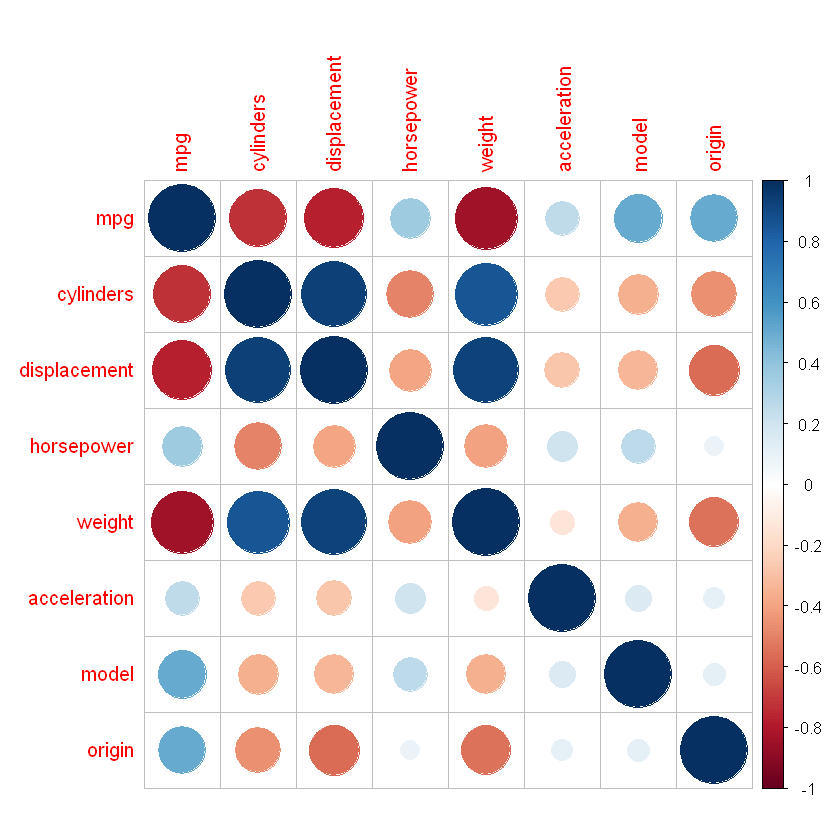

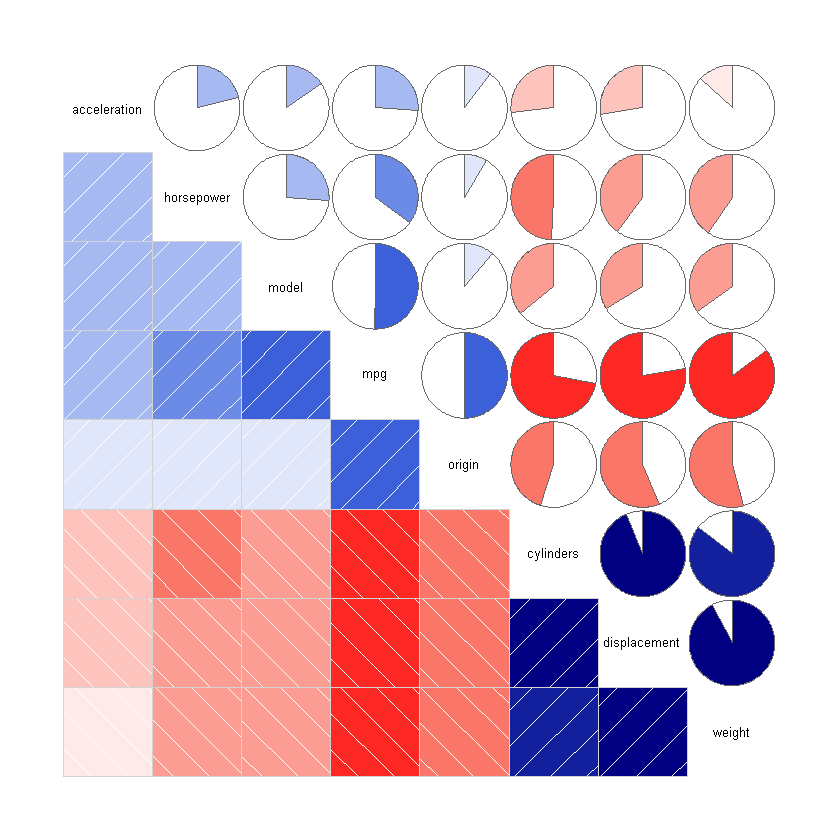

In [21]:
library(corrplot)
corrplot(cor_data)

library(corrgram)
corrgram(df ,order = TRUE, lower.panel = panel.shade, upper.panel = panel.pie, text.panel = panel.txt)

## Regresja

1. Zbuduj wybrany modele:
- regrsji liniowej prostej
- oraz wielorakiej (peny model, regresja krokowa wsteczna, regresja krokowa postępująca)
2. Wykonaj predykcję dla każdego modelu.
3. Oceń, który model daje najlepsze wyniki

In [33]:
model <- lm(mpg ~ weight, data = df)

In [34]:
summary(model)


Call:
lm(formula = mpg ~ weight, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5441 -2.8516 -0.5529  2.2792 13.1128 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 53.5090303  1.1918829   44.90   <2e-16 ***
weight      -0.0094890  0.0004182  -22.69   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.089 on 198 degrees of freedom
Multiple R-squared:  0.7223,	Adjusted R-squared:  0.7209 
F-statistic: 514.9 on 1 and 198 DF,  p-value: < 2.2e-16


In [35]:
prediction <- predict(model, df)
head(prediction)

1        2        3        4        5        6 
36.47620 18.86454 19.59520 18.92148 23.21052 36.19153

In [39]:
results <- cbind(prediction, df$mpg)
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

head(results)

,pred,real
,<dbl>,<dbl>
1,36.47620,33.0
2,18.86454,20.0
3,19.59520,18.0
4,18.92148,18.5
5,23.21052,17.5
6,36.19153,29.5


In [ ]:
install.packages("Metrics")

In [40]:
library(Metrics)

In [41]:
mae(results$real, results$pred)
mse(results$real, results$pred)
rmse(results$real, results$pred)

[1] 3.145239

[1] 16.5514

[1] 4.068341

In [42]:
summary(model)$adj.r.squared

[1] 0.7208558

# Wieloraka

In [43]:
full_model <- lm(mpg ~ ., data = df)

In [44]:
summary(full_model)


Call:
lm(formula = mpg ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.398  0.000  0.000  0.000  4.398 

Coefficients: (1 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -26.390468  32.723506  -0.806   0.4326
cylinders                                -2.743748   2.524723  -1.087   0.2943
displacement                              0.075010   0.083969   0.893   0.3858
horsepower                               -0.014174   0.049752  -0.285   0.7796
weight                                   -0.007287   0.005650  -1.290   0.2167
acceleration                             -0.131128   0.363667  -0.361   0.7234
model                                     0.860508   0.338776   2.540   0.0226
origin                                    5.548400   5.779784   0.960   0.3523
caramc concord d/l                       -4.082247   4.975864  -0.820   0.4248
caramc concord dl             

In [47]:
pred <- predict(full_model, df)

res <- cbind(pred, df$mpg)
colnames(res) <- c('pred','real')
res <- as.data.frame(res)

head(res)

,pred,real
,<dbl>,<dbl>
1,33.43723,33.0
2,20.00000,20.0
3,18.00000,18.0
4,18.50000,18.5
5,17.50000,17.5
6,29.50000,29.5


In [48]:
summary(full_model)$adj.r.squared

[1] 0.8675223

In [49]:
mae(res$real, res$pred)
mse(res$real, res$pred)
rmse(res$real, res$pred)

[1] 0.2457392

[1] 0.5950797

[1] 0.7714141

# krokowa wsteczna

In [50]:
model_back <- step(full_model, direction = "backward")

Start:  AIC=266.19
mpg ~ cylinders + displacement + horsepower + weight + acceleration + 
    model + origin + car


Step:  AIC=266.19
mpg ~ cylinders + displacement + horsepower + weight + acceleration + 
    model + car

                Df Sum of Sq     RSS    AIC
- horsepower     1      0.64  119.66 265.27
- acceleration   1      1.03  120.05 265.91
<none>                        119.02 266.19
- displacement   1      6.33  125.35 274.55
- cylinders      1      9.37  128.39 279.35
- weight         1     13.20  132.22 285.22
- model          1     51.19  170.21 335.74
- car          178   2322.44 2441.46 514.41

Step:  AIC=265.27
mpg ~ cylinders + displacement + weight + acceleration + model + 
    car

                Df Sum of Sq     RSS    AIC
<none>                        119.66 265.27
- acceleration   1      1.54  121.20 265.82
- displacement   1      5.70  125.36 272.57
- cylinders      1      9.56  129.22 278.64
- weight         1     12.75  132.41 283.51
- model          1     

In [51]:
summary(model_back)


Call:
lm(formula = mpg ~ cylinders + displacement + weight + acceleration + 
    model + car, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.38   0.00   0.00   0.00   4.38 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -22.097612  29.289041  -0.754 0.461530
cylinders                                -2.371713   2.097794  -1.131 0.274897
displacement                              0.066599   0.076317   0.873 0.395757
weight                                   -0.006749   0.005169  -1.306 0.210154
acceleration                             -0.155614   0.343068  -0.454 0.656211
model                                     0.847076   0.325704   2.601 0.019311
caramc concord d/l                       -3.464290   4.347699  -0.797 0.437226
caramc concord dl                        -1.260319   3.765143  -0.335 0.742174
caramc concord dl 6                      -0.975927   3.641461  -0.268 0.792120
caram

In [55]:
pred_back <- predict(model_back, df)

res_back <- cbind(pred_back, df$mpg)
colnames(res_back) <- c('pred','real')
res_back <- as.data.frame(res_back)

head(res_back)

,pred,real
,<dbl>,<dbl>
1,33.34566,33.0
2,20.00000,20.0
3,18.00000,18.0
4,18.50000,18.5
5,17.50000,17.5
6,29.50000,29.5


In [56]:
summary(model_back)$adj.r.squared

[1] 0.8751301

In [57]:
mae(res_back$real, res_back$pred)
mse(res_back$real, res_back$pred)
rmse(res_back$real, res_back$pred)

[1] 0.2503686

[1] 0.5982995

[1] 0.7734983

# krokowa postępująca

In [52]:
min_model <- lm(mpg ~ 1, data = df)

In [53]:
model_forward <- step(min_model, scope = list(lower = min_model, upper = full_model), direction = "forward")

Start:  AIC=819.51
mpg ~ 1

                Df Sum of Sq     RSS    AIC
+ car          178   11709.0   209.6 367.34
+ weight         1    8608.3  3310.3 565.29
+ displacement   1    7202.4  4716.2 636.09
+ cylinders      1    6189.6  5729.0 674.99
+ model          1    3028.9  8889.6 762.86
+ origin         1    2994.7  8923.9 763.63
+ horsepower     1    1470.4 10448.1 795.17
+ acceleration   1     796.4 11122.1 807.68
<none>                       11918.6 819.51

Step:  AIC=367.34
mpg ~ car

               Df Sum of Sq    RSS    AIC
+ model         1    63.766 145.79 296.77
+ cylinders     1    27.203 182.36 341.53
+ weight        1    23.938 185.62 345.08
+ displacement  1    22.391 187.17 346.74
+ horsepower    1    14.305 195.25 355.20
<none>                      209.56 367.34
+ acceleration  1     0.863 208.69 368.51

Step:  AIC=296.77
mpg ~ car + model

               Df Sum of Sq    RSS    AIC
+ weight        1   16.3768 129.42 274.94
+ cylinders     1   10.3342 135.46 284.07
+ 

In [54]:
summary(model_forward)


Call:
lm(formula = mpg ~ car + model + weight + cylinders + displacement + 
    acceleration, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.38   0.00   0.00   0.00   4.38 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -22.097612  29.289041  -0.754 0.461530
caramc concord d/l                       -3.464290   4.347699  -0.797 0.437226
caramc concord dl                        -1.260319   3.765143  -0.335 0.742174
caramc concord dl 6                      -0.975927   3.641461  -0.268 0.792120
caramc pacer d/l                         -3.414410   4.718875  -0.724 0.479779
caramc spirit dl                          4.359786   4.473778   0.975 0.344303
caraudi 4000                              8.882786   5.018723   1.770 0.095789
caraudi 5000                              1.032402   5.070656   0.204 0.841230
caraudi 5000s (diesel)                   17.536519   5.903255   2.971 0.009014
carbm

In [58]:
pred_forward <- predict(model_forward, df)

res_forward <- cbind(pred_forward, df$mpg)
colnames(res_forward) <- c('pred','real')
res_forward <- as.data.frame(res_forward)

head(res_forward)

,pred,real
,<dbl>,<dbl>
1,33.34566,33.0
2,20.00000,20.0
3,18.00000,18.0
4,18.50000,18.5
5,17.50000,17.5
6,29.50000,29.5


In [59]:
summary(model_forward)$adj.r.squared

[1] 0.8751301

In [60]:
mae(res_forward$real, res_forward$pred)
mse(res_forward$real, res_forward$pred)
rmse(res_forward$real, res_forward$pred)

[1] 0.2503686

[1] 0.5982995

[1] 0.7734983